In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from process_data import  get_df

pd.set_option('display.float_format', lambda x: '%.0f' % x)

df = get_df()


postgres_connection


In [2]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [3]:
#  Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you 
# identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

non_numeric_columns = df.select_dtypes(exclude=['number']).columns

df_numeric = df.drop(non_numeric_columns, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())

In [4]:
# In the current dataset you’re expected to track the user’s engagement using : 
# sessions frequency 

session_frequency = df['MSISDN/Number'].value_counts()
session_frequency = session_frequency .reset_index()
session_frequency.columns = ['MSISDN/Number', 'session_frequency']
session_frequency.head(10)


,MSISDN/Number,session_frequency
0,33626320676,18
1,33614892860,17
2,33625779332,17
3,33659725664,16
4,33760536639,15
5,33675877202,15
6,33667163239,13
7,33603127838,12
8,33786323068,12
9,33760413819,12


In [11]:
# In the current dataset you’re expected to track the user’s engagement using : 
# sessions  session duration
session_frequency = df['MSISDN/Number'].value_counts()
session_frequency = session_frequency .reset_index()
session_frequency.columns = ['MSISDN/Number', 'session_frequency']

# In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
# total data usage (DL and UL)
import pandas as pd


df['Total Data Usage'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)'] 

# Group by customer_id and sum the session durations and total data usage
total_data_usage_dur = df.groupby('MSISDN/Number')[['Total Data Usage', 'Dur. (ms)']].sum()

total_data_usage_dur

,Total Data Usage,Dur. (ms)
MSISDN/Number,,
33601001722,878690574,116720
33601001754,156859643,181230
33601002511,595966483,134969
33601007832,422320698,49878
33601008617,1457410944,37104
...,...,...
33789996170,714641641,8810
33789997247,480307335,140988
3197020876596,232123971,877385


In [13]:

merged_df = pd.merge(session_frequency, total_data_usage_dur,  on='MSISDN/Number', how='outer')
merged_df

,MSISDN/Number,session_frequency,Total Data Usage,Dur. (ms)
0,33626320676,18,7971167261,8791927
1,33614892860,17,8846226494,9966898
2,33625779332,17,8499620722,18553754
3,33659725664,16,7705862783,4035428
4,33760536639,15,8514773963,9279434
...,...,...,...,...
106851,33660679060,1,646349893,56896
106852,33645165347,1,634702779,97547
106853,33658209707,1,197565402,93169
106854,33663377441,1,734390097,95564


In [14]:
# In the current dataset you’re expected to track the user’s engagement using : 
# total data usage (DL and UL)

total_duration = merged_df[['MSISDN/Number', 'Dur. (ms)']].sort_values(by='Dur. (ms)', ascending=False)
total_duration.head(10)

,MSISDN/Number,Dur. (ms)
2,33625779332,18553754
1,33614892860,9966898
4,33760536639,9279434
0,33626320676,8791927
6,33667163239,8744914
43,33662840755,6614270
37,33664693736,6288730
7,33603127838,6287761
334,33667456716,5649882
9,33760413819,5321667


In [15]:
total_Total_Data_Usage = merged_df[['MSISDN/Number', 'Total Data Usage']].sort_values(by='Total Data Usage', ascending=False)
total_Total_Data_Usage.head(10)

,MSISDN/Number,Total Data Usage
1,33614892860,8846226494
4,33760536639,8514773963
2,33625779332,8499620722
0,33626320676,7971167261
5,33675877202,7891110608
3,33659725664,7705862783
15,33666464084,7308500938
9,33760413819,7132370514
12,33664712899,6872018208
14,33698792269,6540899126


/mnt/d/tenacademy/codes/week1/eda/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


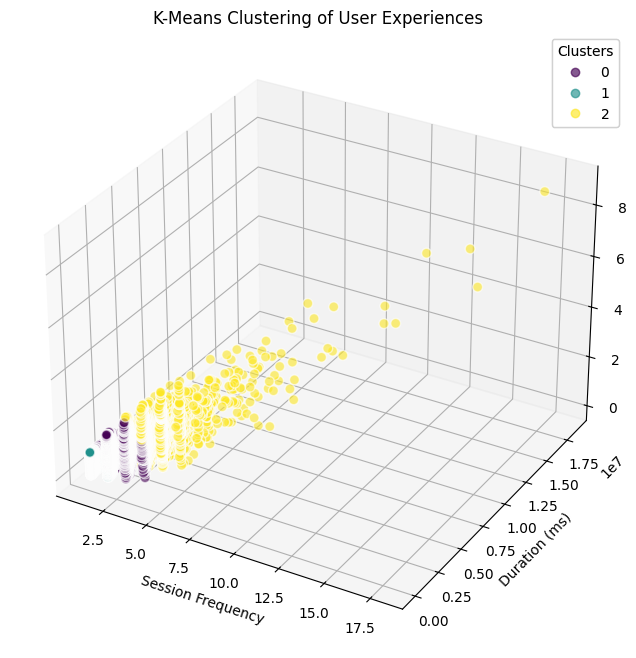

In [16]:
# Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

# Select the engagement metrics for clustering
engagement_metrics = [
    'Total Data Usage',
    'Dur. (ms)',
    'session_frequency',
]

# Drop rows with missing values in the selected columns
df_cluster = merged_df[engagement_metrics].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters using a rearranged 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_cluster['session_frequency'],
    df_cluster['Dur. (ms)'],
    df_cluster['Total Data Usage'],
    c=df_cluster['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6,
    edgecolors='w'
)

ax.set_xlabel('Session Frequency')
ax.set_ylabel('Duration (ms)')
ax.set_zlabel('Total Data Usage')
ax.set_title('K-Means Clustering of User Experiences')

legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()

